In [4]:
#!git clone https://github.com/NSCC-COGS/GDAA2030.git

Cloning into 'GDAA2030'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 380 (delta 3), reused 0 (delta 0), pack-reused 370
Receiving objects: 100% (380/380), 22.48 MiB | 35.25 MiB/s, done.
Resolving deltas: 100% (161/161), done.


In [5]:
%cd /content/GDAA2030/tutorial2/kqmaynard/


/content/GDAA2030/tutorial2/kqmaynard


In [0]:
%%capture
%run GDAA_2030_T2_KMaynard_getlandsat.ipynb

In [7]:
print(selectedScene)

productId                   LC08_L1TP_127046_20190930_20191001_01_RT
entityId                                       LC81270462019273LGN00
acquisitionDate                           2019-09-30 03:24:09.983812
cloudCover                                                      0.95
processingLevel                                                 L1TP
path                                                             127
row                                                               46
min_lat                                                      19.1699
min_lon                                                      104.076
max_lat                                                      21.2753
max_lon                                                      106.256
download_url       https://s3-us-west-2.amazonaws.com/landsat-pds...
lat                                                          20.2226
lon                                                          105.166
dist                              

In [0]:
from matplotlib import pyplot as plt
import tifffile
import numpy as np

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
def ourPlot (a, interpolation = 'bilinear', histogram=True):
  stats = {
      'max' : np.nanmax(a),
      'min' : np.nanmin(a),
      'mean' : np.nanmean(a),
      'std' : np.nanstd(a),
      'bitDepth' : a.dtype, 
      'dimensions' : a.shape,
      'top_left_value' : a[0,0]
  }
  
  for item in stats:
    print ('%s: %s' %(item, stats[item]))

  plt.cla()
  plt.subplot(121)
  plt.imshow(a, interpolation = interpolation)
  if histogram:
    plt.subplot(122)
    plt.hist(a.flatten(),bins=100)
    s0 = stats['mean'] - stats['std']
    s1 = stats['mean'] + stats['std']
    plt.axvline(s0,c='red')
    plt.axvline(s1,c='red')

max: 53139
min: 0
mean: 5725.600173777988
std: 3970.863830803046
bitDepth: uint16
dimensions: (7761, 7601)
top_left_value: 0


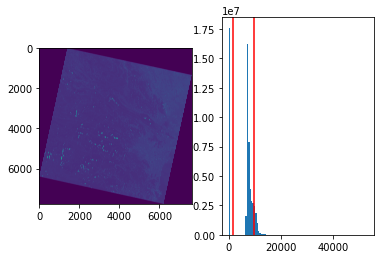

In [11]:
imageFullSize = tifffile.imread(imagePath)
ourPlot(imageFullSize)

max: 43358
min: 0
mean: 5712.475862383878
std: 3976.159719092482
bitDepth: uint16
dimensions: (777, 761)
top_left_value: 0


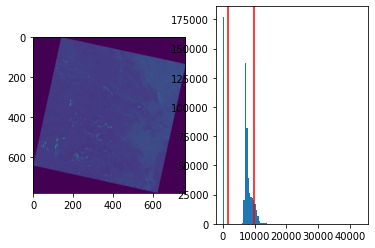

In [12]:
image = imageFullSize[::10,::10]

ourPlot(image)

max: True
min: False
mean: 0.2999237269933722
std: 0.45822427366932167
bitDepth: bool
dimensions: (777, 761)
top_left_value: True


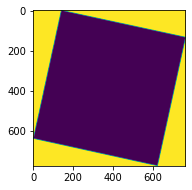

In [13]:
mask = image == 0
ourPlot(mask, histogram=False)

max: 1
min: 0
mean: 0.2999237269933722
std: 0.45822427366932167
bitDepth: int32
dimensions: (777, 761)
top_left_value: 1


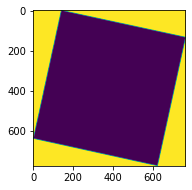

In [14]:
from scipy.ndimage import label
labelMask,unused = label(mask)
ourPlot(labelMask, histogram=False)

In [15]:
print(image.mean())
print(image[~mask].mean()) #note that this character will flip the mask so that it changes

5712.475862383878
8159.79070087667


max: True
min: False
mean: 0.2382592842513999
std: 0.42601854152068375
bitDepth: bool
dimensions: (777, 761)
top_left_value: False


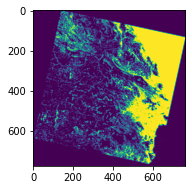

In [16]:
thresholdImage = image > image[~mask].mean() # image is greater than the mean
ourPlot(thresholdImage, histogram=False)

max: True
min: False
mean: 0.2382592842513999
std: 0.42601854152068375
bitDepth: bool
dimensions: (777, 761)
top_left_value: False


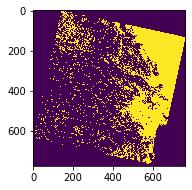

In [17]:
ourPlot(thresholdImage, interpolation = 'nearest', histogram=False)

max: 13711
min: 0
mean: 606.785968810936
std: 2081.5202088200776
bitDepth: int32
dimensions: (777, 761)
top_left_value: 0


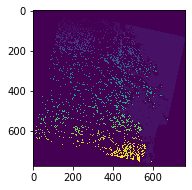

In [18]:
labelThreshold,unused = label(thresholdImage)
ourPlot(labelThreshold, interpolation = 'nearest', histogram=False)

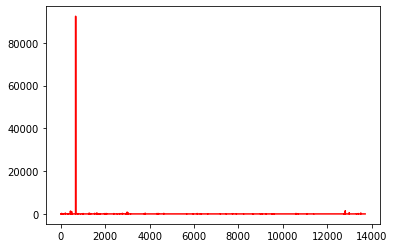

In [19]:
labels, pixelCount = np.unique(labelThreshold[labelThreshold!=0], return_counts=True)
plt.plot(labels, pixelCount, c='red')

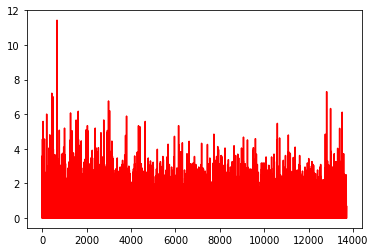

In [20]:
plt.plot(labels, np.log(pixelCount), c='red')

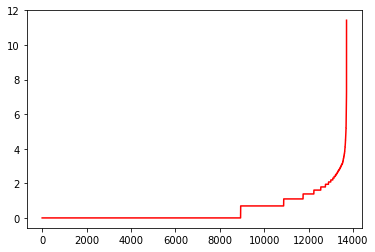

In [21]:
pixelCountorted = np.sort(pixelCount)
plt.plot(np.log(pixelCountorted), c='red')

Label: 670
max: True
min: False
mean: 0.156342751612134
std: 0.3631799769129358
bitDepth: bool
dimensions: (777, 761)
top_left_value: False


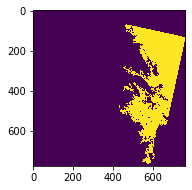

In [22]:
sorter = np.argsort(pixelCount)
largestLabel = labels[sorter][-1] # will grab the last value in an array - results in label with the largest
#pixel count
print('Label:',largestLabel)

largestArea = (labelThreshold == largestLabel)
ourPlot((largestArea), interpolation='nearest', histogram=False)

Label: 12815
max: True
min: False
mean: 0.00250973706952682
std: 0.050034371079975236
bitDepth: bool
dimensions: (777, 761)
top_left_value: False


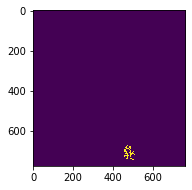

In [23]:
secondLargestLabel = labels[sorter][-2] #grab label with the second largest pixel count
print('Label:', secondLargestLabel)
secondLargestArea = (labelThreshold == secondLargestLabel)
ourPlot((secondLargestArea), interpolation='nearest', histogram=False)

max: True
min: False
mean: 0.0015068569602078143
std: 0.03878899769663155
bitDepth: bool
dimensions: (777, 761)
top_left_value: False


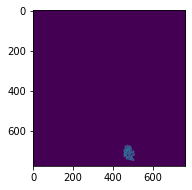

In [24]:
from skimage.morphology import dilation
seconLargestPerm = ~secondLargestArea & dilation (secondLargestArea) # shows not the mask area and is dilated
ourPlot(seconLargestPerm, interpolation='bilinear', histogram=False) #makes it easier to see

max: 43358.0
min: 6177.0
mean: 8159.791
std: 1616.619
bitDepth: float32
dimensions: (777, 761)
top_left_value: nan


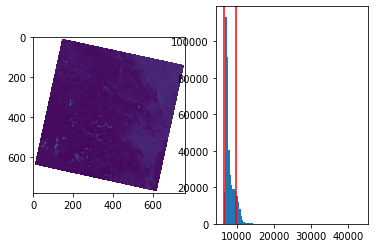

In [25]:
image32 = image.astype(np.float32)
image32[mask] = np.nan
ourPlot(image32)

max: 26074.0
min: 8160.0
mean: 9772.387
std: 952.5055
bitDepth: float32
dimensions: (777, 761)
top_left_value: nan


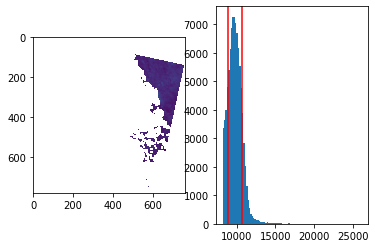

In [26]:
image32LargestArea = image32.copy()
image32LargestArea[~largestArea] = np.nan #sets all not in the largest area to not a number
ourPlot(image32LargestArea)

In [0]:
def stdScale(a, n=1, inplace=False):
  if inplace:
    b=a
  else:
    b=a.copy()
  s0 = np.nanmean(b) - np.nanstd(b)/n
  s1 = np.nanmean(b) + np.nanstd(b)/n
  print('Scale from %f to %f' %(s0,s1))
  b[b<s0] = s1 # array is less than the mean - std, SET it to the mean - std
  b[b>s1] = s1 # array is greater than the mean + std, Set it to the mean + std
  return b

Scale from 6543.171997 to 9776.410034
max: 9776.41
min: 6544.0
mean: 8001.442
std: 987.013
bitDepth: float32
dimensions: (777, 761)
top_left_value: nan


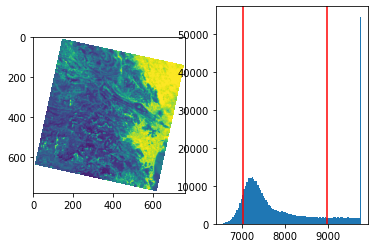

In [28]:
image32_scaled = stdScale(image32)
ourPlot(image32_scaled)

Scale from 8819.881226 to 10724.892212
max: 10724.893
min: 8820.0
mean: 10025.696
std: 619.9204
bitDepth: float32
dimensions: (777, 761)
top_left_value: nan


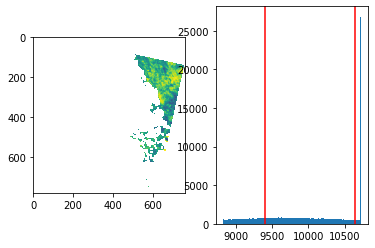

In [35]:
image32LargestArea_scaled = stdScale(image32LargestArea)
ourPlot(image32LargestArea_scaled)

In [0]:
def convert32(a, maskVal=0, inplace=False):
  if inplace:
    b=a
  else: 
    b=a.copy()
  mask = b == maskVal
  b = b.astype(np.float32)
  b[mask] = np.nan
  return b

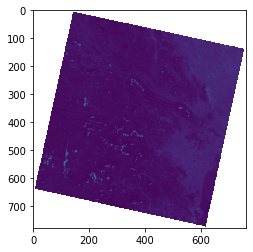

In [37]:
from skimage.feature import peak_local_max

localMaxPts = peak_local_max(image32, min_distance=20) #image as a 32 bit
plt.imshow(image32)
plt.scatter(localMaxPts[:, 1], localMaxPts[:, 0],c='red')

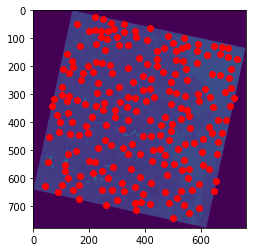

In [38]:
localMaxPts = peak_local_max(image, min_distance=20) #original image in 16b it integer
plt.imshow(image)
plt.scatter(localMaxPts[:, 1], localMaxPts[:, 0],c='red')

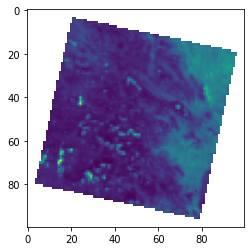

In [39]:
import skimage
image32Resamp = skimage.transform.resize(image32, output_shape = [100,100]) #32 bit image
plt.imshow(image32Resamp)

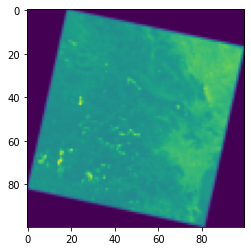

In [40]:
imageResamp = skimage.transform.resize(image, output_shape = [100,100]) # our original image in 16bit integer
plt.imshow(imageResamp)

In [0]:
def normalize(a, inplace=False):
  if inplace:
    b=a
  else:
    b=a.copy()
  
  if b.dtype != np.float32:
    b = b.astype(np.float32)

  b -= np.nanmin(b)
  b /= np.nanmax(b)
  #print (np.nanmin(b), np.nanmax(b))

  return b

max: 1.0
min: 0.0
mean: 0.45088392
std: 0.30534893
bitDepth: float32
dimensions: (777, 761)
top_left_value: nan


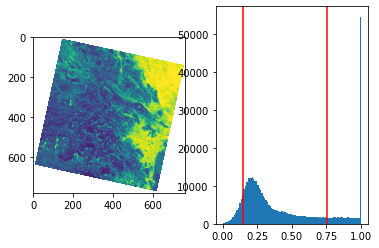

In [42]:
image32_scaled_norm = normalize(image32_scaled)
ourPlot(image32_scaled_norm)

In [0]:
def scale8bit(a, return_mask=True, inplace=False):
  if inplace:
    b=a
  else:
    b=a.copy()

  if return_mask:
    mask = ~np.isnan(b)
  b *= 255
  b = b.astype(np.uint8)

  if return_mask:
    mask = mask.astype(np.uint8)
    mask *= 255

    return b,mask

  else:
    return b

max: 255
min: 0
mean: 80.18624143197074
std: 83.73570991171503
bitDepth: uint8
dimensions: (777, 761)
top_left_value: 0


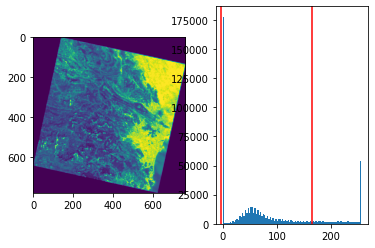

In [44]:
image8Bit,mask8Bit = scale8bit(image32_scaled_norm)
ourPlot(image8Bit)

max: 255
min: 0
mean: 178.51944961669008
std: 116.847189785677
bitDepth: uint8
dimensions: (777, 761)
top_left_value: 0


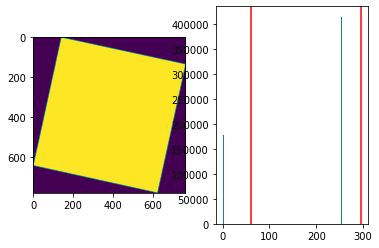

In [45]:
ourPlot(mask8Bit)

In [0]:
def makeComposite(bands=[4,3,2]):
  images = []
  for band in bands:
    imageUrl, imagePath = glf.getImageIO(selectedScene, band, imageDir)
    glf.downloadImage(imageUrl,imagePath)
    im = tifffile.imread(imagePath)[::10,::10] #reduce the resolution of the images by a factor of 10
    images.append(im)

  return np.dstack(images)

https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/127/046/LC08_L1TP_127046_20190930_20191001_01_RT/LC08_L1TP_127046_20190930_20191001_01_RT_B4.TIF
.\images/LC08_L1TP_127046_20190930_20191001_01_RT_B4.TIF
.\images/LC08_L1TP_127046_20190930_20191001_01_RT_B4.TIF  already found
https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/127/046/LC08_L1TP_127046_20190930_20191001_01_RT/LC08_L1TP_127046_20190930_20191001_01_RT_B3.TIF
.\images/LC08_L1TP_127046_20190930_20191001_01_RT_B3.TIF
downloading.... https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/127/046/LC08_L1TP_127046_20190930_20191001_01_RT/LC08_L1TP_127046_20190930_20191001_01_RT_B3.TIF
https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/127/046/LC08_L1TP_127046_20190930_20191001_01_RT/LC08_L1TP_127046_20190930_20191001_01_RT_B2.TIF
.\images/LC08_L1TP_127046_20190930_20191001_01_RT_B2.TIF
downloading.... https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/127/046/LC08_L1TP_127046_20190930_20191001_01_RT/LC08_L1TP_127046_201909

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


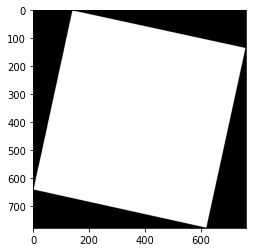

In [47]:
compositeImage = makeComposite([4,3,2])
plt.imshow(compositeImage)

In [0]:
def makeCompositeRGBA(bands=[4,3,2]):
  images = []
  for band in bands:
    imageUrl, imagePath = glf.getImageIO(selectedScene, band, imageDir)
    glf.downloadImage(imageUrl,imagePath)
    im = tifffile.imread(imagePath)[::10,::10] #reduce size of arrays by a factor of 10x10 to save on memory
    im = convert32(im, inplace=True)
    im = stdScale(im, n=.5, inplace=True) 
    im = normalize(im, inplace=True)
    im,mask = scale8bit(im, return_mask=True, inplace=True)
    images.append(im)
  images.append(mask)
  
  return np.dstack(images)

https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/127/046/LC08_L1TP_127046_20190930_20191001_01_RT/LC08_L1TP_127046_20190930_20191001_01_RT_B4.TIF
.\images/LC08_L1TP_127046_20190930_20191001_01_RT_B4.TIF
.\images/LC08_L1TP_127046_20190930_20191001_01_RT_B4.TIF  already found
Scale from 4926.552979 to 11393.029053
https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/127/046/LC08_L1TP_127046_20190930_20191001_01_RT/LC08_L1TP_127046_20190930_20191001_01_RT_B3.TIF
.\images/LC08_L1TP_127046_20190930_20191001_01_RT_B3.TIF
.\images/LC08_L1TP_127046_20190930_20191001_01_RT_B3.TIF  already found
Scale from 6575.863281 to 11816.302734
https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/127/046/LC08_L1TP_127046_20190930_20191001_01_RT/LC08_L1TP_127046_20190930_20191001_01_RT_B2.TIF
.\images/LC08_L1TP_127046_20190930_20191001_01_RT_B2.TIF
.\images/LC08_L1TP_127046_20190930_20191001_01_RT_B2.TIF  already found
Scale from 7366.938965 to 12432.215332
max: 255
min: 0
mean: 98.7153917574417
std: 92

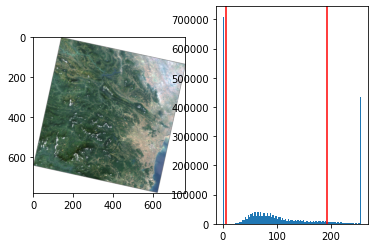

In [56]:
imageRGBA = makeCompositeRGBA([4,3,2])
ourPlot(imageRGBA)

max: 255
min: 0
mean: 178.51772459525415
std: 116.84794297343359
bitDepth: uint8
dimensions: (777, 761)
top_left_value: 0


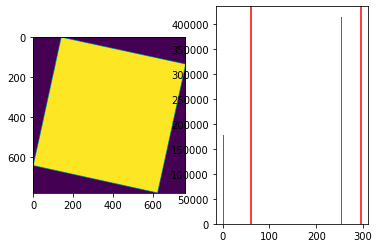

In [57]:
ourPlot(imageRGBA[:,:,3])

In [58]:
import folium

m = folium.Map([selectedScene.lat, selectedScene.lon], zoom_start=7)

folium.raster_layers.ImageOverlay(
    image=imageRGBA,
    bounds=[[selectedScene.min_lat, selectedScene.min_lon], [selectedScene.max_lat, selectedScene.max_lon]],).add_to(m)

m